## GRADIENT BOOSTING EXPERIMENTS

In [1]:
import lightgbm as lgb
import mytrain_lib_cluster as ml
import pandas as pd
import numpy as np
import re

In [2]:
path_root  = 'f:\\TFG\\'
path_train = path_root + 'datasets\\raw_datasets\\'

<a href=https://neptune.ai/blog/xgboost-vs-lightgbm>XGBoost vs LightGBM</a><br>
<a href=https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles>Histogram based gradient boosting ensembles</a>

### LIGHT GBM

In [3]:
TOTALITEMS = 2576339

def get_regex(cases):
    str_drop = ''
    for d in cases:
        str_drop += '(' + str(d) + ')|'
    if str_drop=='': str_drop='2jn2409ãsdf'
    pattern = re.compile(r'^((?!' + str_drop[:-1] + r').)*(_home|_away)+$')
    return pattern, str_drop

def get_matches(frac):
    split = int(frac * TOTALITEMS)
    permutation = np.random.permutation(np.arange(TOTALITEMS))
    train_matches = permutation[:split]
    test_matches  = permutation[split:]
    return train_matches, test_matches

def split_data(df,features,possible_matches):
    matches = np.intersect1d(df[features].dropna().index.to_numpy(),possible_matches)
    labels = df.loc[matches,'FTR']
    df = df.loc[matches,features]
    print(df.shape)
    return df.astype('float64'),labels

def load_csv(path,dataset,index,to_drop=[]):
    df = pd.read_csv(path+dataset+'.csv',sep=';',decimal=',',index_col=index)
    df = df.drop(columns=to_drop,errors='ignore')
    return df

def load_data(dataset,drop=[],factor=-1,regression=False):
    np.random.seed(0)
    pattern, str_drop = get_regex(drop)
    train_matches, test_matches = get_matches(frac=0.8)
    metafeats = ['aux','Div','Date','HomeTeam','AwayTeam','HTHG','HTAG','HTR','HS','AS','HST',
                'AST','HC','AC','HF','AF','HY','AY','HR','AR','season','IdH','IdA','FTHG','FTAG']
    df = load_csv(path_train,dataset,index='matchId',to_drop=drop).drop(columns=metafeats,errors='ignore')
    features = np.array(list(filter(pattern.match,df.columns)))
    train_df, train_labels = split_data(df,features,train_matches)
    test_df,  test_labels  = split_data(df,features,test_matches)
    return train_df, train_labels, test_df, test_labels

def create_dataset(df,labels):
    return lgb.Dataset(df,labels)

In [4]:
# getData = ml.FootballMatchesDataset
# train, test = getData(dataset='historical_longterm',file='train'), getData(dataset='historical_longterm',file='test')
# train.shape(), test.shape()

In [5]:
train_df, train_labels, test_df, test_labels = load_data('historical_longterm')

(13901, 140)
(3472, 140)


AttributeError: 'str' object has no attribute 'read'

In [45]:
import json
with open('F:\TFG\experiments\scores\scores.json', mode='r') as scores_file:
    json_data = scores_file.read()
data = json.loads(json_data)
data.append({'name':'yyyy','accuracy':0.6,'error':1.06})
json_data = json.dumps(data)
print(json_data)
with open('F:\TFG\experiments\scores\scores.json', mode='w') as scores_file:
    scores_file.write(json_data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [131]:
import importlib
import utils_lgb
importlib.reload(utils_lgb)
utils_lgb.load_data('historical_goals_longterm','anova',50)

['side_avg_15D_home' 'Scored_15D_home' 'Received_15D_home'
 'points_15D_home' 'side_avg_15D_away' 'Scored_15D_away'
 'Received_15D_away' 'points_15D_away' 'side_avg_30D_home'
 'Scored_30D_home' 'Received_30D_home' 'points_30D_home'
 'side_avg_30D_away' 'Scored_30D_away' 'Received_30D_away'
 'points_30D_away' 'side_avg_60D_home' 'Scored_60D_home'
 'Received_60D_home' 'points_60D_home' 'side_avg_60D_away'
 'Scored_60D_away' 'Received_60D_away' 'points_60D_away'
 'side_avg_180D_home' 'Scored_180D_home' 'Received_180D_home'
 'points_180D_home' 'side_avg_180D_away' 'Scored_180D_away'
 'Received_180D_away' 'points_180D_away' 'side_avg_365D_home'
 'Scored_365D_home' 'Received_365D_home' 'points_365D_home'
 'side_avg_365D_away' 'Scored_365D_away' 'Received_365D_away'
 'points_365D_away' 'side_avg_730D_home' 'Scored_730D_home'
 'Received_730D_home' 'points_730D_home' 'side_avg_730D_away'
 'Scored_730D_away' 'Received_730D_away' 'points_730D_away'
 'side_avg_1825D_home' 'Scored_1825D_home' 'Rece

IndexError: Boolean index has wrong length: 80 instead of 81

In [ ]:
train_df

In [116]:
load_csv(path_train,'historical_goals_longterm',index='matchId')

,aux,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,IdH,...,derby_points_5_home,derby_Scored_5_away,derby_Side_5_away,derby_points_5_away,derby_Scored_10_home,derby_Side_10_home,derby_points_10_home,derby_Scored_10_away,derby_Side_10_away,derby_points_10_away
matchId,,,,,,,,,,,,,,,,,,,,,
0,0,E0,2000-08-19,Charlton,Man City,4.0,0.0,1,1,4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,2000-08-19,Chelsea,West Ham,4.0,2.0,1,1,1610,...,1.00,7.0,0.0,1.6,9.0,7.0,1.142857,9.0,0.0,1.571429
2,2,E0,2000-08-19,Coventry,Middlesbrough,1.0,3.0,2,1,4001,...,0.00,10.0,0.0,3.0,1.0,4.0,0.000000,10.0,0.0,3.000000
3,3,E0,2000-08-19,Derby,Southampton,2.0,2.0,0,1,4002,...,1.75,6.0,0.0,1.0,7.0,4.0,1.750000,6.0,0.0,1.000000
4,4,E0,2000-08-19,Leeds,Everton,2.0,0.0,1,1,4003,...,0.60,8.0,0.0,1.8,5.0,7.0,0.571429,12.0,0.0,1.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49493,49493,F1,2000-05-13,Nancy,Auxerre,2.0,0.0,1,9900,4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49494,49494,F1,2000-05-13,Rennes,Metz,2.0,0.0,1,9900,3774,...,2.00,2.0,2.0,0.5,3.0,0.0,2.000000,2.0,2.0,0.500000
49495,49495,F1,2000-05-13,Sedan,Marseille,2.0,2.0,0,9900,4116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from sklearn.model_selection import KFold
train_df

,side_avg_15D_home,Scored_15D_home,Received_15D_home,points_15D_home,Shots_15D_home,Target_15D_home,Corner_15D_home,Faults_15D_home,YellowCards_15D_home,RedCards_15D_home,...,side_avg_1825D_away,Scored_1825D_away,Received_1825D_away,points_1825D_away,Shots_1825D_away,Target_1825D_away,Corner_1825D_away,Faults_1825D_away,YellowCards_1825D_away,RedCards_1825D_away
matchId,,,,,,,,,,,,,,,,,,,,,
149,2.0,0.0,3.0,0.0,6.5,2.5,4.5,17.0,4.0,0.0,...,7.0,21.0,27.0,1.133333,11.266667,5.200000,6.666667,12.800000,1.466667,0.866667
151,2.0,2.0,4.0,0.5,8.0,4.5,4.0,18.0,1.5,0.0,...,7.0,14.0,30.0,0.800000,7.866667,3.733333,4.400000,12.800000,1.600000,0.800000
152,2.0,4.0,2.0,3.0,10.5,4.0,5.0,8.5,1.5,0.0,...,7.0,18.0,31.0,0.666667,8.666667,3.866667,4.533333,13.533333,2.200000,1.066667
154,2.0,2.0,4.0,0.0,11.0,6.5,8.0,14.0,2.0,0.0,...,7.0,21.0,21.0,1.400000,9.000000,5.466667,5.866667,12.133333,1.266667,0.666667
156,2.0,4.0,2.0,3.0,9.0,5.5,6.0,14.5,1.5,0.0,...,7.0,19.0,26.0,0.733333,9.133333,4.800000,4.600000,13.133333,2.133333,1.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576330,1.0,4.0,2.0,3.0,12.0,5.0,7.5,14.5,4.5,2.5,...,18.0,33.0,83.0,0.567568,12.270270,3.918919,4.351351,13.000000,2.108108,1.162162
2576332,1.0,4.0,2.0,2.0,18.0,7.0,8.0,8.0,1.5,0.5,...,37.0,73.0,122.0,0.920000,10.253333,3.480000,3.760000,14.400000,2.040000,0.960000
2576334,1.0,3.0,1.0,2.0,11.0,3.0,4.0,12.5,2.0,1.0,...,75.0,174.0,272.0,1.013245,11.364238,3.701987,4.695364,14.218543,2.291391,1.185430


In [11]:
params = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_samples': 10,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 1000,
    'n_jobs': -1,
    'num_leaves': 50,
    'objective': 'multiclass',
    'num_class': 3,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': .75,
    'subsample_for_bin': 200000,
    'subsample_freq': 10,
    'feature_pre_filter': False,
    'verbose': -1
}

params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_leaves': 10,
    'num_class': 3,
    'subsample': .75,
    'subsample_freq': 5,
    'max_depth': 3,
    'n_estimators': 250,
    'min_child_samples': 5,
    'reg_lambda': .5,
    'colsample_bytree': .25,
    'min_data_in_leaf': 50
} 

In [12]:
train_df['random'] = np.random.rand(len(train_df),1)
test_df['random'] = np.random.rand(len(test_df),1)

In [13]:
train_df.shape

(13901, 141)

In [14]:
model = lgb.LGBMClassifier(**params)
eval_set=[(test_df,test_labels),(train_df,train_labels)]
eval_names = ['validation','training']

model.fit(train_df,train_labels,eval_set=eval_set,eval_names=eval_names,
            verbose=25,callbacks=[lgb.early_stopping(stopping_rounds=15)])

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=50
Training until validation scores don't improve for 15 rounds
[25]	training's multi_logloss: 0.967399	validation's multi_logloss: 0.991602
Early stopping, best iteration is:
[32]	training's multi_logloss: 0.961043	validation's multi_logloss: 0.990412


LGBMClassifier(colsample_bytree=0.25, max_depth=3, min_child_samples=5,
               min_data_in_leaf=50, n_estimators=250, num_class=3,
               num_leaves=10, objective='multiclass', reg_lambda=0.5,
               subsample=0.75, subsample_freq=5)

In [71]:
from sklearn.metrics import log_loss


In [72]:
log_loss(np.array([[.3,.6,.4]]), np.array([2,1,2,1]))

ValueError: y_true and y_pred contain different number of classes 3, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2]

In [59]:
import json
kk = [{'1':2},{'2':3}]
kk.append({'3':0})
json.dumps(kk)

'[{"1": 2}, {"2": 3}, {"3": 0}]'

In [70]:
kk = json.loads('[{"1":2},{"2":3}]')
kk.append({'3':0})
json.dumps(kk)

'[{"1": 2}, {"2": 3}, {"3": 0}]'

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

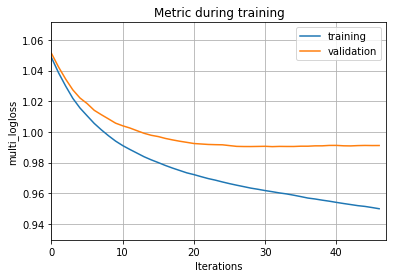

In [17]:
# import matplotlib.pyplot as plt
lgb.plot_metric(model)
# plt.savefig()

In [73]:
preds = model.predict(test_df)
np.mean(preds==test_labels)*100

52.563364055299544

In [102]:
test_labels.dtypes, preds.dtype

(dtype('int64'), dtype('int64'))

In [114]:
log_loss([2,1,1,2,0],
...          [[.1,.1, .9], [.05,.9, .1], [.03,.8, .2], [.06,.35, .65],[.7,.1,.2]])

0.29065009940006525

In [115]:
log_loss(y_true=test_labels,y_pred=preds,labels=[0,1,2])

ValueError: The number of classes in labels is different from that in y_pred. Classes found in labels: [0 1 2]

In [39]:
pd.options.display.max_rows = 20
fi = (pd.DataFrame({'feature':train_df.columns,'importance':model.feature_importances_})
        ).set_index('feature')
fia = pd.DataFrame()

In [42]:
fia = pd.concat([fia,fi.add_suffix('_3')],axis=1)
fia

,importance_1,importance_2,importance_3
feature,,,
side_avg_15D_home,1,1,1
Scored_15D_home,2,2,2
Received_15D_home,1,1,1
points_15D_home,0,0,0
Shots_15D_home,4,4,4
...,...,...,...
Corner_1825D_away,11,11,11
Faults_1825D_away,6,6,6
YellowCards_1825D_away,7,7,7


In [54]:
model

LGBMClassifier(colsample_bytree=0.25, max_depth=3, min_child_samples=5,
               min_data_in_leaf=50, n_estimators=250, num_class=3,
               num_leaves=10, objective='multiclass', reg_lambda=0.5,
               subsample=0.75, subsample_freq=5)

In [48]:
np.array(
    [[.2,.3,.4]]
).argmax(axis=1)

array([2], dtype=int64)

In [44]:
fia.mean(axis=1)

feature
side_avg_15D_home          1.0
Scored_15D_home            2.0
Received_15D_home          1.0
points_15D_home            0.0
Shots_15D_home             4.0
                          ... 
Corner_1825D_away         11.0
Faults_1825D_away          6.0
YellowCards_1825D_away     7.0
RedCards_1825D_away        5.0
random                     7.0
Length: 141, dtype: float64

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

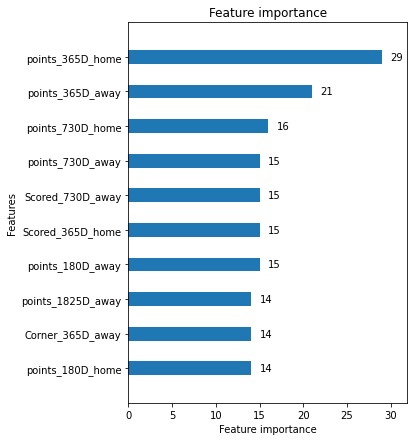

In [204]:
lgb.plot_importance(model,max_num_features=10,figsize=(5,7),height=.4,grid=False)

In [124]:
trainset = lgb.Dataset(train_df,train_labels)
cv = KFold(n_splits=4,shuffle=True,random_state=1)

eval_hist = lgb.cv(params,trainset,folds=cv)

In [125]:
eval_hist['multi_logloss-mean']

In [108]:
model = lgb.train(params,trainset)

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22483
[LightGBM] [Info] Number of data points in the train set: 13901, number of used features: 140
[LightGBM] [Info] Start training from score -1.375206
[LightGBM] [Info] Start training from score -0.765403
[LightGBM] [Info] Start training from score -1.265614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [110]:
model.eval_train()

<bound method Booster.eval_train of <lightgbm.basic.Booster object at 0x0000028DDA9E6C70>>

In [48]:
preds = model.predict(test_df.data)
preds

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\lightgbm\basic.py:739: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')
c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


TypeError: Expected np.float32 or np.float64, met type(object)

In [156]:
preds_res = preds.argmax(axis=1)
np.mean(preds_res==test_df.label)

0.5172811059907834

In [153]:
np.bincount(preds_res)/len(preds)

array([0.01670507, 0.73415899, 0.24913594])